In [102]:
# Model 2
#Implementation of RNN(LSTM)

In [27]:
# import libraries
import tensorflow as tf
print(tf.__version__)
from sklearn import datasets
from sklearn import preprocessing
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, month_plot
from statsmodels.tsa.stattools import kpss, adfuller
from statsmodels.tsa.seasonal import STL

from statsmodels.tsa.seasonal import seasonal_decompose

from pylab import rcParams
from platform import python_version

2.8.0


In [28]:
df = pd.read_csv("_eir_dataset/thesis_data.csv")

In [29]:
print(df.head(5),"\n")

           Datetime   AG_MW      REGION
0  16-02-2022 00:00  4959.0  All Island
1  16-02-2022 00:15  4984.0  All Island
2  16-02-2022 00:30  5063.0  All Island
3  16-02-2022 00:45  5068.0  All Island
4  16-02-2022 01:00  5014.0  All Island 



In [30]:
# dropping the third column
df.drop(df.columns[2], axis=1, inplace=True)

In [31]:
print(df.head(5))

           Datetime   AG_MW
0  16-02-2022 00:00  4959.0
1  16-02-2022 00:15  4984.0
2  16-02-2022 00:30  5063.0
3  16-02-2022 00:45  5068.0
4  16-02-2022 01:00  5014.0


<AxesSubplot:>

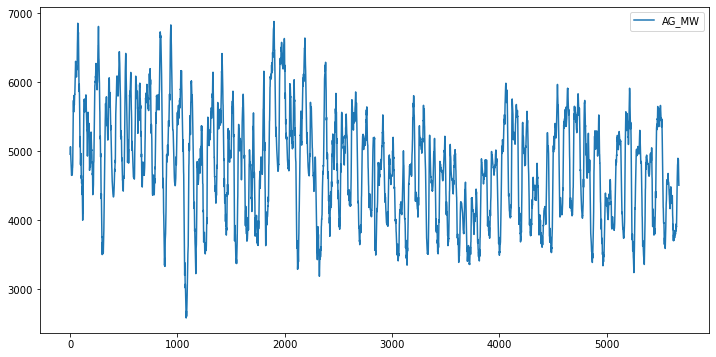

In [32]:
df.plot(figsize=(12,6))

In [33]:
df = df.set_index('Datetime')

In [34]:
print(df.head(5))

                   AG_MW
Datetime                
16-02-2022 00:00  4959.0
16-02-2022 00:15  4984.0
16-02-2022 00:30  5063.0
16-02-2022 00:45  5068.0
16-02-2022 01:00  5014.0


In [35]:
df.isnull().sum()

AG_MW    4
dtype: int64

In [36]:
df.fillna(method ='pad',inplace=True)

In [37]:
df.isnull().sum()

AG_MW    0
dtype: int64

In [38]:
n = len(df)
print(n)

5672


In [39]:
input_size = 96

In [40]:
train_data = df.iloc[0 : (n-input_size)]
test_data = df.iloc[(n-input_size):]

In [41]:
print(df.head())
print(df.tail())

                   AG_MW
Datetime                
16-02-2022 00:00  4959.0
16-02-2022 00:15  4984.0
16-02-2022 00:30  5063.0
16-02-2022 00:45  5068.0
16-02-2022 01:00  5014.0
                   AG_MW
Datetime                
16-04-2022 11:30  4842.0
16-04-2022 11:45  4727.0
16-04-2022 12:00  4641.0
16-04-2022 12:15  4568.0
16-04-2022 12:30  4509.0


In [42]:
num_features = df.shape[1]

In [43]:
print(num_features)

1


# Normalising Data

In [46]:
# train_data = df.iloc[0 : (n-input_size)]
# test_data = df.iloc[(n-input_size):]

# train_mean = train_data.mean()
# train_std = train_data.std()


# train_data = (train_data - train_mean) / train_std

# validation_data = (validation_data - train_mean) / train_std

# test_data = (test_data - train_mean) / train_std

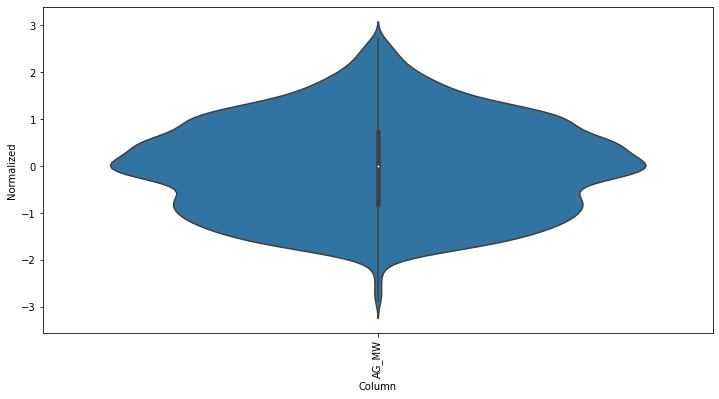

In [47]:
df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

In [60]:

# w1 = WindowGenerator(input_width=96, label_width=1, shift=24,
#                      label_columns=['AG_MW'])
# w1

In [51]:
# def plot(self, model=None, plot_col='AG_MW', max_subplots=3):
#   inputs, labels = self.example
#   plt.figure(figsize=(12, 8))
#   plot_col_index = self.column_indices[plot_col]
#   max_n = min(max_subplots, len(inputs))
#   for n in range(max_n):
#     plt.subplot(max_n, 1, n+1)
#     plt.ylabel(f'{plot_col} [normed]')
#     plt.plot(self.input_indices, inputs[n, :, plot_col_index],
#              label='Inputs', marker='.', zorder=-10)

#     if self.label_columns:
#       label_col_index = self.label_columns_indices.get(plot_col, None)
#     else:
#       label_col_index = plot_col_index

#     if label_col_index is None:
#       continue

#     plt.scatter(self.label_indices, labels[n, :, label_col_index],
#                 edgecolors='k', label='Labels', c='#2ca02c', s=64)
#     if model is not None:
#       predictions = model(inputs)
#       plt.scatter(self.label_indices, predictions[n, :, label_col_index],
#                   marker='X', edgecolors='k', label='Predictions',
#                   c='#ff7f0e', s=64)

#     if n == 0:
#       plt.legend()

#   plt.xlabel('Time [h]')

# WindowGenerator.plot = plot

In [52]:
# w2.plot()

In [188]:
# Model

In [53]:
train_data = df.iloc[0 : (n-input_size)]
test_data = df.iloc[(n-input_size):]

train_mean = train_data.mean()
train_std = train_data.std()

train_data = (train_data - train_mean) / train_std

test_data = (test_data - train_mean) / train_std

In [54]:
print(train_data)

                     AG_MW
Datetime                  
16-02-2022 00:00  0.214580
16-02-2022 00:15  0.247177
16-02-2022 00:30  0.350183
16-02-2022 00:45  0.356702
16-02-2022 01:00  0.286293
...                    ...
15-04-2022 11:30 -0.149201
15-04-2022 11:45 -0.243080
15-04-2022 12:00 -0.300451
15-04-2022 12:15 -0.312186
15-04-2022 12:30 -0.314793

[5576 rows x 1 columns]


In [55]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()

In [56]:
scaler.fit(train_data)
scaled_training_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)

In [57]:
scaled_training_data[:10]

array([[0.13350395],
       [0.15483045],
       [0.22222222],
       [0.22648752],
       [0.18042226],
       [0.15397739],
       [0.1130305 ],
       [0.07464278],
       [0.04905097],
       [0.02601834]])

In [61]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [62]:
# let us check this for one Day

n_input = 96
n_features = 1
generator = TimeseriesGenerator(scaled_training_data, scaled_training_data, length=n_input, batch_size=1)
# generator = TimeseriesGenerator(train_data, train_data, length=n_input, batch_size=1)

In [63]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Defining Model

In [107]:
# Defining the model
model = Sequential()

model.add(LSTM(100, activation = 'tanh', input_shape=(n_input, n_features)))
model.add(Dense(200, activation='tanh'))
model.add(Dense(300, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='mse')

In [108]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 100)               40800     
                                                                 
 dense_6 (Dense)             (None, 200)               20200     
                                                                 
 dense_7 (Dense)             (None, 300)               60300     
                                                                 
 dense_8 (Dense)             (None, 1)                 301       
                                                                 
Total params: 121,601
Trainable params: 121,601
Non-trainable params: 0
_________________________________________________________________


In [110]:
model.fit(generator, epochs=10)

Epoch 1/10
5480/5480 [==============================] - 147s 27ms/step - loss: 0.2298
Epoch 2/10
5480/5480 [==============================] - 150s 27ms/step - loss: 0.2279
Epoch 3/10
5480/5480 [==============================] - 152s 28ms/step - loss: 0.2268
Epoch 4/10
5480/5480 [==============================] - 150s 27ms/step - loss: 0.2264
Epoch 5/10
5480/5480 [==============================] - 152s 28ms/step - loss: 0.2264
Epoch 6/10
5480/5480 [==============================] - 152s 28ms/step - loss: 0.2262
Epoch 7/10
5480/5480 [==============================] - 170s 31ms/step - loss: 0.2262
Epoch 8/10
5480/5480 [==============================] - 170s 31ms/step - loss: 0.2259
Epoch 9/10
5480/5480 [==============================] - 153s 28ms/step - loss: 0.2260
Epoch 10/10
5480/5480 [==============================] - 153s 28ms/step - loss: 0.2259


In [111]:
model.save("Base_Model_2_1/")

INFO:tensorflow:Assets written to: Base_Model_2_1/assets


INFO:tensorflow:Assets written to: Base_Model_2_1/assets


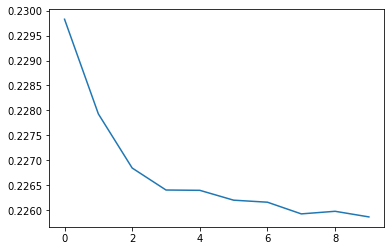

In [112]:
loss_each_epochs = model.history.history['loss']
plt.plot(range(len(loss_each_epochs)), loss_each_epochs)

In [113]:
last_trained_batch = scaled_training_data[-96:]

In [114]:
print(scaled_training_data.shape)

(5576, 1)


In [115]:
last_trained_batch = last_trained_batch.reshape((1, n_input, n_features))
print(n_input)
print(n_features)

96
1


In [116]:
model.predict(last_trained_batch)

array([[0.00012275]], dtype=float32)

In [117]:
scaled_test_data[0]

array([-0.21369162])

In [118]:
print(len(test_data))

96


In [119]:
print(n_input)

96


In [120]:
test_predictions = []

first_eval_batch = scaled_training_data[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

# print(len(current_batch))

for i in range(len(test_data)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)

In [121]:
test_predictions

[array([0.00012275], dtype=float32),
 array([0.01089516], dtype=float32),
 array([0.02870342], dtype=float32),
 array([0.03776604], dtype=float32),
 array([0.06536359], dtype=float32),
 array([0.05054101], dtype=float32),
 array([0.04189026], dtype=float32),
 array([0.03252724], dtype=float32),
 array([0.0218972], dtype=float32),
 array([0.01631287], dtype=float32),
 array([0.01384285], dtype=float32),
 array([0.01293918], dtype=float32),
 array([0.01328465], dtype=float32),
 array([0.01418054], dtype=float32),
 array([0.01517019], dtype=float32),
 array([0.01610348], dtype=float32),
 array([0.01675007], dtype=float32),
 array([0.0170691], dtype=float32),
 array([0.01713312], dtype=float32),
 array([0.01701084], dtype=float32),
 array([0.01681057], dtype=float32),
 array([0.01661548], dtype=float32),
 array([0.01646617], dtype=float32),
 array([0.0163812], dtype=float32),
 array([0.01635465], dtype=float32),
 array([0.01636794], dtype=float32),
 array([0.01640204], dtype=float32),
 arr

In [122]:
# current_batch
test_data.head()

,AG_MW,Predictions
Datetime,,
15-04-2022 12:45,-0.316097,0.019375
15-04-2022 13:00,-0.339567,0.081842
15-04-2022 13:15,-0.377379,0.108250
15-04-2022 13:30,-0.458220,0.127633
15-04-2022 13:45,-0.507767,0.142796


In [123]:
true_predictions = scaler.inverse_transform(test_predictions)

In [124]:
test_data['Predictions'] = true_predictions

In [125]:
test_data.head(100)

,AG_MW,Predictions
Datetime,,
15-04-2022 12:45,-0.316097,0.010711
15-04-2022 13:00,-0.339567,0.027176
15-04-2022 13:15,-0.377379,0.054396
15-04-2022 13:30,-0.458220,0.068248
15-04-2022 13:45,-0.507767,0.110429
...,...,...
16-04-2022 11:30,0.062026,0.035708
16-04-2022 11:45,-0.087919,0.035708
16-04-2022 12:00,-0.200052,0.035708


<AxesSubplot:xlabel='Datetime'>

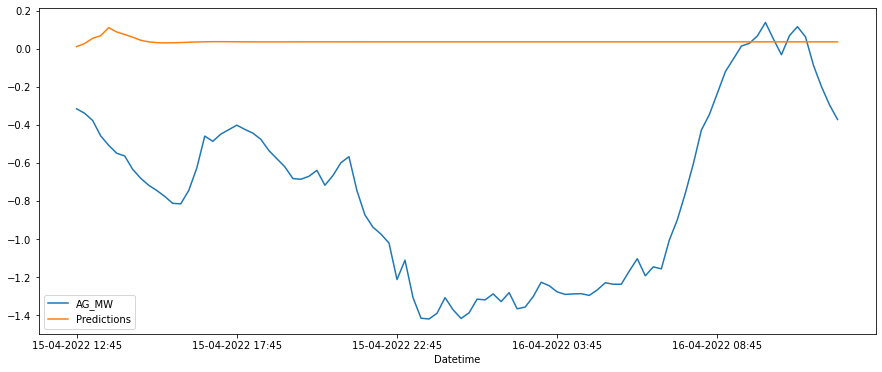

In [126]:
test_data.plot(figsize=(15,6))

In [127]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from math import sqrt

mse = sqrt(mean_squared_error(test_data['AG_MW'], test_data['Predictions']))

In [128]:
print("Mean Square Error",mse)

Mean Square Error 0.922065373587615
